## Estadística Aplicada
Sesión 13 - 26 septiembre

Joel Fayam Rivera Peña 2076323

Grupo 42

In [1]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Librerías especiales
from statsmodels.tsa.seasonal import seasonal_decompose
## tamaño de graficas (largo,alto
plt.rcParams['figure.figsize']=(10,6)

In [5]:
#Datos
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month' ,parse_dates=True)
#Parse dates reconoce como comando de fecha 

In [6]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

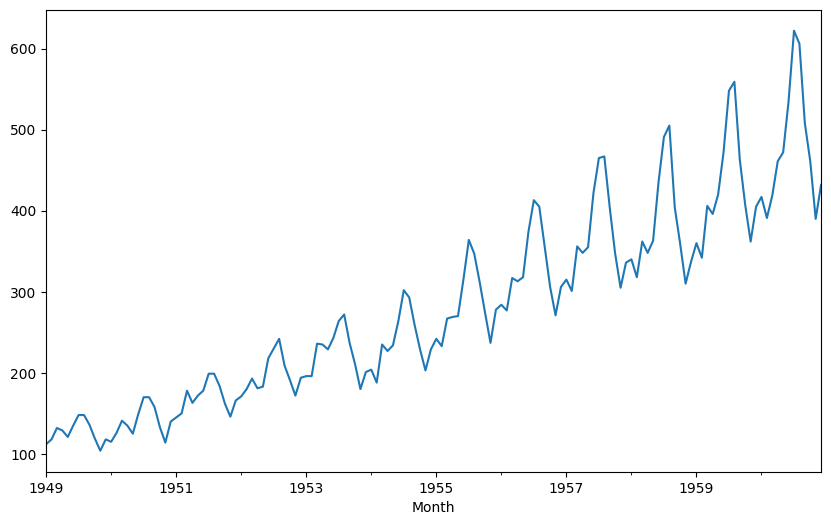

In [11]:
pasajeros['Thousands of Passengers'].plot()

La serie tiene componente estacional y tiene tendencia creciente.

Vamos a obtener tres componentes:
1. Tendencia-ciclo
2. Estacional
3. Irregular

In [12]:
ets1=seasonal_decompose(pasajeros['Thousands of Passengers'],model='mult')

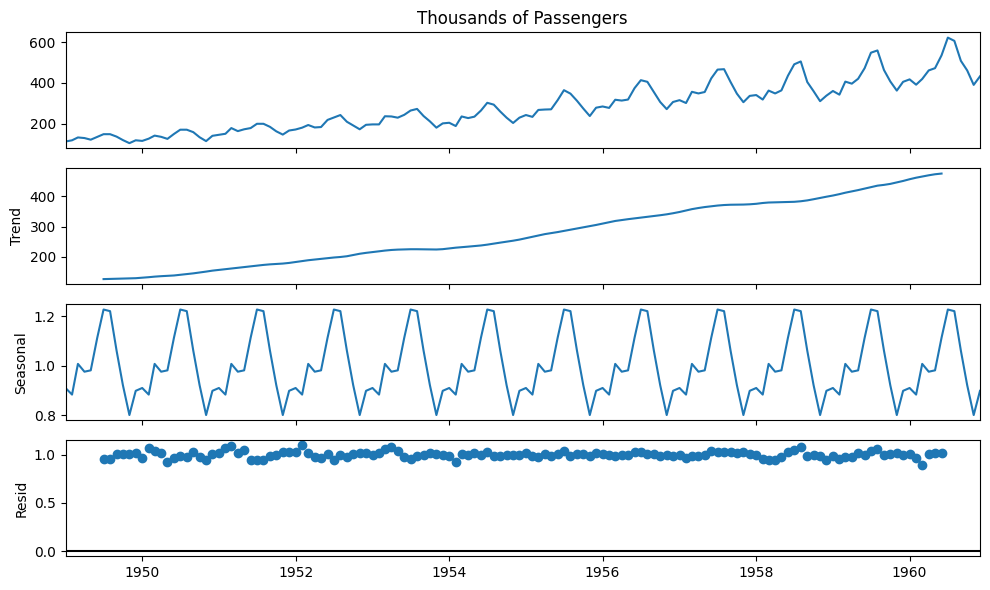

In [13]:
ets1.plot();

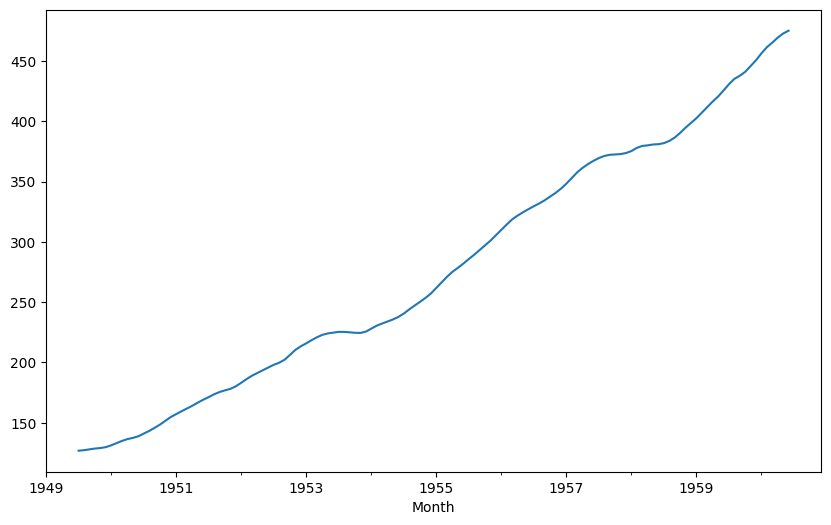

In [19]:
## Tendencia - ciclo
ets1.trend.plot();

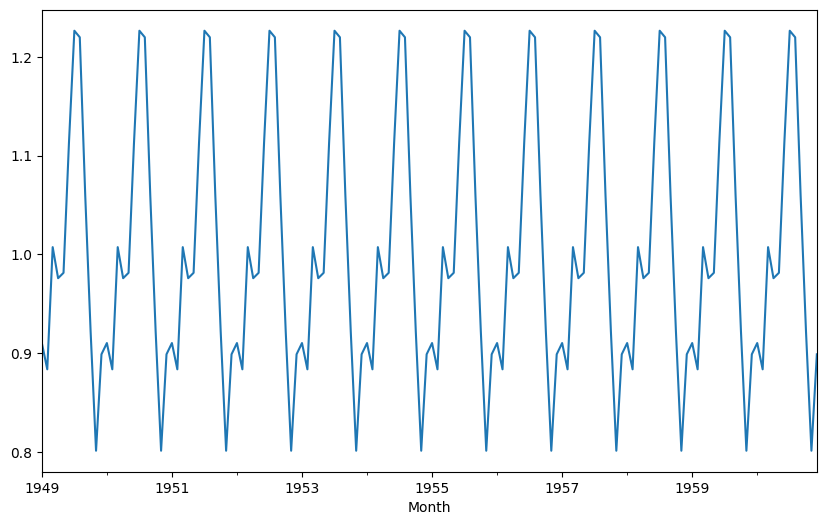

In [22]:
## Estacional
ets1.seasonal.plot();

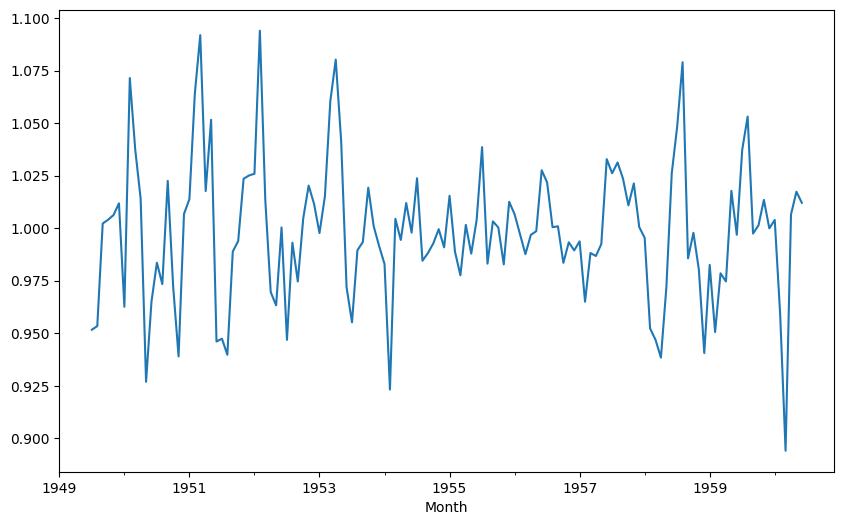

In [23]:
## Irregular
ets1.resid.plot();

In [24]:
ets1.seasonal.head(12)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Name: seasonal, dtype: float64

In [27]:
## Desestacionalizar
    # Quitarle componente estacional

pasajeros['desestacionalizada']=pasajeros['Thousands of Passengers']/ets1.seasonal

In [32]:
pasajeros

,Thousands of Passengers,destacionalizada,desestacionalizada
Month,,,
1949-01-01,112,123.045774,123.045774
1949-02-01,118,133.540764,133.540764
1949-03-01,132,131.034760,131.034760
1949-04-01,129,132.184860,132.184860
1949-05-01,121,123.296015,123.296015
...,...,...,...
1960-08-01,606,496.757563,496.757563
1960-09-01,508,479.022974,479.022974
1960-10-01,461,500.131683,500.131683


<Axes: xlabel='Month'>

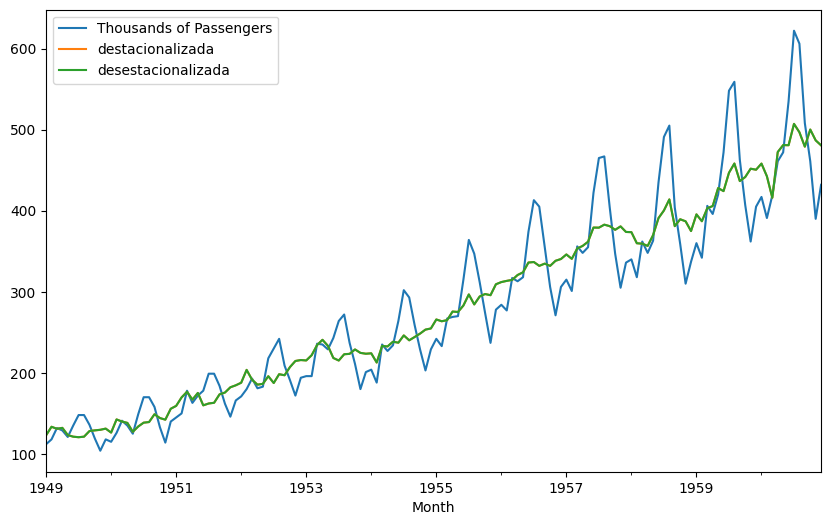

In [31]:
pasajeros.plot()

In [33]:
pasajeros['tendencia-ciclo']=ets1.trend

In [34]:
pasajeros=pasajeros[['Thousands of Passengers','tendencia-ciclo']]

In [35]:
pasajeros.head()

,Thousands of Passengers,tendencia-ciclo
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


In [36]:
pasajeros.to_excel('Pasajeros.xlsx')

In [ ]:
pip install yfinance

In [38]:
import yfinance as yf

In [39]:
## Descargar el precio de la acción de Walmart de México
## ticker (nombre en bolsa)
walmex=yf.download('WALMEX.MX',
                   start='2017-01-01',
                   end='2022-12-31',
                   progress=False)

In [41]:
walmex=walmex['Adj Close']

In [42]:
walmex.to_excel('walmex.xlsx')